1-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

먼저 이미지를 읽어들여 사이즈를 바꿉니다. 

In [8]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

PIL 라이브러리 import 완료!
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


학습데이터를 300개 준비합니다.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [ ]:
불러들인 학습데이터 중 한개를 출력해 봅니다.

라벨:  0


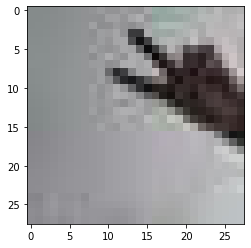

In [10]:
plt.imshow(x_train[19])
print('라벨: ', y_train[19])
# 학습용 가위 이미지 출력

model을 만듭니다. 잘 모르니 이번 시간에 배웠던 코드를 재활용합니다.
전에 다루었던 그림화일은 흑백이었는데 이번엔 컬러로 바뀌었으니 input_shape=(28,28,1) -> input_shape=(28,28,3)로 바꿔줍니다.

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

n_channel_1=32   # Conv2D 레이어에서 입력 이미지의 특징 수
n_channel_2=64   # Conv2D 레이어에서 입력 이미지의 특징 수
n_dense=64       # Dense 레이어에서 뉴런수    
n_train_epoch=10 # 학습 반복 횟수

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

모델을 학습시킵니다.

In [19]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 21.6102 - accuracy: 0.3600
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 2.3658 - accuracy: 0.5267
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5343 - accuracy: 0.5633
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0521 - accuracy: 0.6633
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.8600
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 0.9067
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1708 - accuracy: 0.9467
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1506 - accuracy: 0.9500
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1351 - accuracy: 0.9600


테스트용 이미지를 만듭니다.

In [14]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


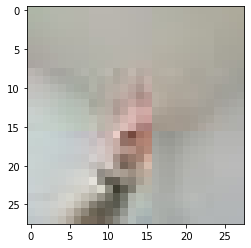

In [15]:
plt.imshow(x_test[19])
print('라벨: ', y_test[19])
# 학습용 가위 이미지도 출력해봅니다.

??? 뭐죠 이게?  무언가 잘못되어가고 있다는 것을 느낍니다.

In [20]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.6010 - accuracy: 0.5067
test_loss: 1.6010315418243408 
test_accuracy: 0.5066666603088379


0

test_accuracy는 0.33~0.50 사이로 나오는 것을 확인했습니다.

n_channel_1=32   # Conv2D 레이어에서 입력 이미지의 특징 수
n_channel_2=64   # Conv2D 레이어에서 입력 이미지의 특징 수
n_dense=64       # Dense 레이어에서 뉴런수    

으로 예제보다 수치를 높게 잡아서 훈련시켰고 

n_train_epoch=10 # 학습 반복 횟수

는 그대로 두었습니다.

무엇을 만들었는지 모르겠지만 결과는 나왔습니다.